In [76]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from glob import glob
from IPython.display import Image
import matplotlib.image as mpimg
import cv2
import os

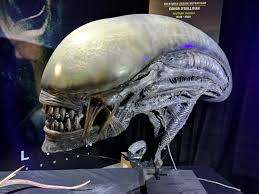

In [2]:
# See Image
img = Image("/home/dhruv/alien_vs_predators/train/alien/5.jpg")
img

In [3]:
PATH = os.path.abspath("/home/dhruv/alien_vs_predators")

In [4]:
# Train Set
# Alien Images
train_alien_images = os.path.join(PATH,"train","alien")
train_alien = glob(os.path.join(train_alien_images, "*.jpg"))
# Predators Images
train_predator_images = os.path.join(PATH,"train","predator")
train_predator = glob(os.path.join(train_predator_images,"*.jpg"))

train = pd.DataFrame()
train['train_set'] = train_alien + train_predator
train.head()

,train_set
0,/home/dhruv/alien_vs_predators/train/alien/116...
1,/home/dhruv/alien_vs_predators/train/alien/95.jpg
2,/home/dhruv/alien_vs_predators/train/alien/333...
3,/home/dhruv/alien_vs_predators/train/alien/334...
4,/home/dhruv/alien_vs_predators/train/alien/182...


In [5]:
train['label'] = [1 if i in train_alien else 0 for i in train['train_set']] # Labels Aliens = 0, Predators = 1
train.head()

,train_set,label
0,/home/dhruv/alien_vs_predators/train/alien/116...,1
1,/home/dhruv/alien_vs_predators/train/alien/95.jpg,1
2,/home/dhruv/alien_vs_predators/train/alien/333...,1
3,/home/dhruv/alien_vs_predators/train/alien/334...,1
4,/home/dhruv/alien_vs_predators/train/alien/182...,1


In [6]:
train.shape

(694, 2)

In [7]:
# Validation Set
# Alien
val_alien_images = os.path.join(PATH,"validation","alien")
val_alien = glob(os.path.join(val_alien_images,"*.jpg"))
# Predator
val_predator_images = os.path.join(PATH,"validation", "predator")
val_predator = glob(os.path.join(val_predator_images,"*.jpg"))

val = pd.DataFrame()
val['val_set'] = val_alien + val_predator
val.head()

,val_set
0,/home/dhruv/alien_vs_predators/validation/alie...
1,/home/dhruv/alien_vs_predators/validation/alie...
2,/home/dhruv/alien_vs_predators/validation/alie...
3,/home/dhruv/alien_vs_predators/validation/alie...
4,/home/dhruv/alien_vs_predators/validation/alie...


In [8]:
val['label'] = [1 if i in val_alien else 0 for i in val['val_set']] # Labels Aliens = 0, Predators = 1
val.head()

,val_set,label
0,/home/dhruv/alien_vs_predators/validation/alie...,1
1,/home/dhruv/alien_vs_predators/validation/alie...,1
2,/home/dhruv/alien_vs_predators/validation/alie...,1
3,/home/dhruv/alien_vs_predators/validation/alie...,1
4,/home/dhruv/alien_vs_predators/validation/alie...,1


In [9]:
val.shape

(200, 2)

In [33]:
# Shapes of images differ!
print(cv2.imread(train_alien[1]).shape)
print(cv2.imread(train_predator[0]).shape[0])

(168, 300, 3)
251


In [34]:
x = cv2.imread(train_alien[1]).shape
y = cv2.imread(train_predator[0]).shape

In [35]:
min(x,y)

(168, 300, 3)

<h1> Select minimum shape value in both train and val set and rescale the images </h1>

In [46]:
l = (99999,99999,4)
for i in range(0,694):
    t = cv2.imread(train.train_set[i]).shape
    l = min(l,x)

In [47]:
l

(225, 224, 3)

In [48]:
k = (99999,99999,4)
for i in range(0,200):
    x = cv2.imread(val.val_set[i]).shape
    k = min(l,x)

In [49]:
k

(225, 224, 3)

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
# Creating a tf Dataset using flow from directory and rescaling simultaneously
# Reference: https://keras.io/api/preprocessing/image
# flow_from_directory returns rescaled images in a tf Dataset
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
                  '/home/dhruv/alien_vs_predators/train', # train contains 2 classes "alien","predators"!
                   target_size = (225,224),
                   class_mode = 'binary')

Found 694 images belonging to 2 classes.


In [54]:
# Creating a tf Dataset using flow from directory and rescaling simultaneously
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow_from_directory(
                  '/home/dhruv/alien_vs_predators/validation',
                   target_size = (225,224),
                   class_mode = 'binary')

Found 200 images belonging to 2 classes.


In [99]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,MaxPooling2D

# Model 1.0

In [83]:
# Model Building

model = Sequential()
model.add(Conv2D(filters = 96,kernel_size = (11,11),strides = (4,4),activation = 'relu',input_shape = (225,224,3)))
model.add(MaxPool2D(pool_size = (3,3),strides = (2,2)))
model.add(Conv2D(filters = 256,kernel_size = (5,5),strides = (1,1)))
model.add(MaxPool2D(pool_size = (3,3),strides = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [88]:
from keras.optimizers import RMSprop,Adam

In [91]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1638464   
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [94]:
model.fit(train_generator,steps_per_epoch=50,epochs = 5,validation_data=val_generator)

Epoch 1/5
50/50 [==============================] - 29s 584ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 34s 677ms/step - loss: 0.6934 - accuracy: 0.4873 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 39s 785ms/step - loss: 0.6934 - accuracy: 0.4880 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 38s 764ms/step - loss: 0.6934 - accuracy: 0.4918 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 42s 833ms/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000


# Model 2.0

In [100]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (225, 224, 3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Conv2D(64, (3, 3), input_shape = (100, 100, 3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size = (3, 3)))

model2.add(Flatten())

model2.add(Dense(64))
model2.add(Activation("relu")) 
model2.add(Dense(128))
model2.add(Activation("relu")) 
model2.add(Dense(activation = 'sigmoid', units=1))

In [101]:
model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 223, 222, 32)      896       
_________________________________________________________________
activation_2 (Activation)    (None, 223, 222, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)            

In [104]:
model2.fit(train_generator,steps_per_epoch=50,epochs = 10,validation_data=val_generator)

Epoch 1/10
50/50 [==============================] - 22s 434ms/step - loss: 0.2967 - accuracy: 0.8861 - val_loss: 0.5505 - val_accuracy: 0.6200
Epoch 2/10
50/50 [==============================] - 22s 440ms/step - loss: 0.1617 - accuracy: 0.9414 - val_loss: 0.6530 - val_accuracy: 0.7150
Epoch 3/10
50/50 [==============================] - 24s 473ms/step - loss: 0.0444 - accuracy: 0.9880 - val_loss: 0.6851 - val_accuracy: 0.7100
Epoch 4/10
50/50 [==============================] - 46s 927ms/step - loss: 0.0118 - accuracy: 0.9981 - val_loss: 0.3988 - val_accuracy: 0.6800
Epoch 5/10
50/50 [==============================] - 31s 624ms/step - loss: 0.0444 - accuracy: 0.9841 - val_loss: 0.6616 - val_accuracy: 0.6750
Epoch 6/10
50/50 [==============================] - 29s 582ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 1.2077 - val_accuracy: 0.6700
Epoch 7/10
50/50 [==============================] - 27s 531ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.8387 - val_accuracy: 0.6850

<p> Add Dropuout Regularization for preventing Overfitting </p>

In [114]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (225, 224, 3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Conv2D(64, (3, 3), input_shape = (100, 100, 3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size = (3, 3)))

model2.add(Flatten())

model2.add(Dense(64))
model2.add(Dropout(0.5))
model2.add(Activation("relu")) 
model2.add(Dense(128))
model2.add(Dropout(0.5))
model2.add(Activation("relu")) 
model2.add(Dense(activation = 'sigmoid', units=1))

In [109]:
model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [107]:
model2.fit(train_generator,steps_per_epoch=50,epochs = 10,validation_data=val_generator)

Epoch 1/10
50/50 [==============================] - 27s 539ms/step - loss: 0.7151 - accuracy: 0.5380 - val_loss: 0.7475 - val_accuracy: 0.5300
Epoch 2/10
50/50 [==============================] - 27s 534ms/step - loss: 0.6077 - accuracy: 0.7057 - val_loss: 0.4383 - val_accuracy: 0.6250
Epoch 3/10
50/50 [==============================] - 28s 554ms/step - loss: 0.4892 - accuracy: 0.7924 - val_loss: 0.4762 - val_accuracy: 0.6950
Epoch 4/10
50/50 [==============================] - 21s 429ms/step - loss: 0.3089 - accuracy: 0.8930 - val_loss: 0.4589 - val_accuracy: 0.7300
Epoch 5/10
50/50 [==============================] - 24s 472ms/step - loss: 0.1513 - accuracy: 0.9475 - val_loss: 0.8054 - val_accuracy: 0.7400
Epoch 6/10
50/50 [==============================] - 28s 557ms/step - loss: 0.0702 - accuracy: 0.9758 - val_loss: 0.3053 - val_accuracy: 0.7300
Epoch 7/10
50/50 [==============================] - 27s 546ms/step - loss: 0.0561 - accuracy: 0.9842 - val_loss: 0.3136 - val_accuracy: 0.7250

# Model 3.0

In [115]:
# Model Building

model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (11,11),strides = (4,4),activation = 'relu',input_shape = (225,224,3)))
model.add(MaxPool2D(pool_size = (3,3),strides = (2,2)))
model.add(Conv2D(filters = 128,kernel_size = (5,5),strides = (1,1)))
model.add(MaxPool2D(pool_size = (3,3),strides = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [116]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [117]:
model.fit(train_generator,steps_per_epoch=50,epochs = 10,validation_data=val_generator)

Epoch 1/10
50/50 [==============================] - 17s 338ms/step - loss: 0.7046 - accuracy: 0.5101 - val_loss: 0.6686 - val_accuracy: 0.6200
Epoch 2/10
50/50 [==============================] - 22s 433ms/step - loss: 0.6380 - accuracy: 0.6551 - val_loss: 0.4850 - val_accuracy: 0.7100
Epoch 3/10
50/50 [==============================] - 21s 428ms/step - loss: 0.5903 - accuracy: 0.7096 - val_loss: 0.9125 - val_accuracy: 0.6050
Epoch 4/10
50/50 [==============================] - 22s 437ms/step - loss: 0.6046 - accuracy: 0.6987 - val_loss: 0.5005 - val_accuracy: 0.7300
Epoch 5/10
50/50 [==============================] - 22s 431ms/step - loss: 0.5416 - accuracy: 0.7392 - val_loss: 0.6378 - val_accuracy: 0.7050
Epoch 6/10
50/50 [==============================] - 21s 410ms/step - loss: 0.5290 - accuracy: 0.7503 - val_loss: 0.4693 - val_accuracy: 0.7050
Epoch 7/10
50/50 [==============================] - 22s 434ms/step - loss: 0.4892 - accuracy: 0.7722 - val_loss: 0.4604 - val_accuracy: 0.7250

# To further prevent overfitting we require more data!